<h1>Analise de Doença Cardíaca</h1>
<p><font color="red"> Autor: João Paulo Ribeiro dos Santos </font></p>

<h2>Importações</h2>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import pickle
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from collections import OrderedDict
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from IPython.display import Image

%matplotlib inline 

/home/joao/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


<h2>Captando e Entendo os Dados</h2>

In [2]:
df_heart_disease = pd.read_csv('heart.csv')

In [3]:
## Dimensão do dataframe
print("Dimensão do dataframe: ", df_heart_disease.shape)

Dimensão do dataframe:  (303, 14)


In [4]:
## Primeiras 5 Linhas do Dataframe
df_heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h3>Dicionário das colunas</h3>

|Variável	|Descrição                                        |
|-----------|-------------------------------------------------|	
|Age	    |Idade do Paciente                                |
|Sex	    |Sexo do Paciente                                 |
|Cp	        |Tipo de dor no peito                             |
|Trestbps	|pressão arterial em repouso da pessoa            |
|Chol	    |Medição do colesterol da pessoa em mg / dl       |
|Fbs	    |O açúcar no sangue em jejum da pessoa            |
|Restecg	|Medida eletrocardiográfica em repouso            |
|Thalach	|A frequência cardíaca máxima da pessoa alcançada |
|Exang	    |Angina induzida pelo exercício (1 = sim; 0 = não)|
|Oldpeak	|Depressão de ST induzida por exercício em rela...|
|Slope	    |A inclinação do segmento ST do pico              |
|Ca	        |O número de navios principais (0-3)              |
|Thal	    |Um distúrbio sanguíneo chamado talassemia        |
|Target	    |Doença cardíaca (0 = não, 1 = sim)               |


<p>
<ol>
    <ul> <font color="red">age:</font> a idade da pessoa em anos</ul>
    <ul> <font color="red">sex:</font> o sexo da pessoa (1 = masculino, 0 = feminino)</ul>
    <ul> <font color="red">cp:</font> Dor no peito (Valor 0: angina típica, Valor 1: angina atípica, Valor 2: dor não anginal, Valor 3: assintomático)</ul>
    <ul> <font color="red">trestbps:</font> pressão arterial em repouso da pessoa (mm Hg na admissão no hospital)</ul>
    <ul> <font color="red">chol:</font> Medição do colesterol da pessoa em mg / dl</ul>
    <ul> <font color="red"> fbs:</font> O açúcar no sangue em jejum da pessoa (> 120 mg / dl, 1 = verdadeiro; 0 = falso)</ul>
    <ul> <font color="red">restecg:</font> Medida eletrocardiográfica em repouso (0 = normal, 1 = com anormalidade da onda ST-T, 2 = mostrando hipertrofia * * * provável ou definitiva do ventrículo esquerdo pelo critério de Estes)</ul>
    <ul> <font color="red">thalach:</font> A frequência cardíaca máxima da pessoa alcançada</ul>
    <ul> <font color="red">exang:</font> Angina induzida pelo exercício (1 = sim; 0 = não)</ul>
    <ul> <font color="red">oldpeak:</font> depressão do ST induzida pelo exercício em relação ao repouso ('ST' refere-se a posições no gráfico de ECG. Veja mais aqui)</ul>
    <ul> <font color="red">declive:</font> a inclinação do pico do segmento ST do exercício (Valor 1: ascendente, Valor 2: plano, Valor 3: descendente)</ul>
    <ul> <font color="red">ca:</font> O número de navios principais (0-3)</ul>
    <ul> <font color="red">thal:</font> um distúrbio sanguíneo chamado talassemia (3 = normal; 6 = defeito fixo; 7 = defeito reversível)</ul>
    <ul> <font color="red">target:</font> Doença cardíaca (0 = não, 1 = sim)</ul>
</ol>
</p>

In [5]:
## Renomeando as colunas
dict_colunas = {'age': "idade", 
                'sex': "sexo", 
                'cp': "tp_dor_peito", 
                'trestbps': "pressao_art_repouso", 
                'chol': "medicao_colesterol", 
                'fbs': "acucar_sangue_jejum",
                'restecg': "medida_eletrocardio",
                'thalach': "freq_cardiaca_max", 
                'exang': "angina_induzida", 
                'oldpeak': "depressao_st", 
                'slope': "inclina_segment_st", 
                'ca': "num_navios_principais",
                'thal': "disturbio_talassemia",
                'target' : "target_doenca_cardiaca"}

df_heart_disease.rename(columns = dict_colunas, inplace = True)

In [6]:
## Primeiras 5 Linhas
df_heart_disease.head(5)

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h2>EDA - Exploratory Data Analysis</h2>

<h3>Tratamento dos valores nulos no dataframe</h3>

In [7]:
## Verificar se há algum nulo
df_heart_disease.isnull().any()

idade                     False
sexo                      False
tp_dor_peito              False
pressao_art_repouso       False
medicao_colesterol        False
acucar_sangue_jejum       False
medida_eletrocardio       False
freq_cardiaca_max         False
angina_induzida           False
depressao_st              False
inclina_segment_st        False
num_navios_principais     False
disturbio_talassemia      False
target_doenca_cardiaca    False
dtype: bool

In [8]:
## Quantidade de valores nulos por dataframe
df_heart_disease.isnull().sum()

idade                     0
sexo                      0
tp_dor_peito              0
pressao_art_repouso       0
medicao_colesterol        0
acucar_sangue_jejum       0
medida_eletrocardio       0
freq_cardiaca_max         0
angina_induzida           0
depressao_st              0
inclina_segment_st        0
num_navios_principais     0
disturbio_talassemia      0
target_doenca_cardiaca    0
dtype: int64

In [9]:
## Porcentagem de valores nulos por dataframe
df_heart_disease.isnull().sum() / len(df_heart_disease) * 100

idade                     0.0
sexo                      0.0
tp_dor_peito              0.0
pressao_art_repouso       0.0
medicao_colesterol        0.0
acucar_sangue_jejum       0.0
medida_eletrocardio       0.0
freq_cardiaca_max         0.0
angina_induzida           0.0
depressao_st              0.0
inclina_segment_st        0.0
num_navios_principais     0.0
disturbio_talassemia      0.0
target_doenca_cardiaca    0.0
dtype: float64

<p><b>Como não há valores nulos, não há o que tratar.</b></p> 🙌
<p>Obs.: Poupamos muito trabalho com isso !!!! </p>

<h3>Identificar os Outliers no Dataframe</h3>

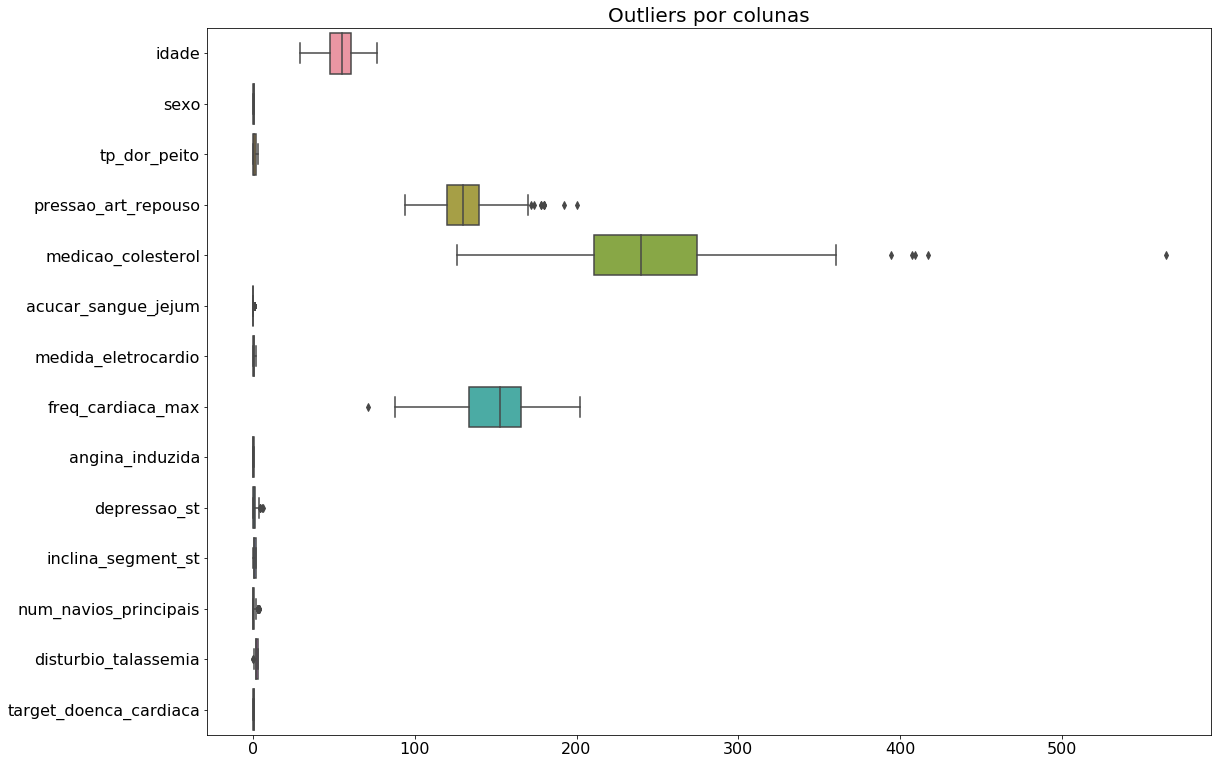

In [10]:
## Boxplot com os outliers

# Plotagem da Figura
plt.figure(figsize = (18,13))
# Plotagem do boxplot horizontal
ax = sns.boxplot(data = df_heart_disease,
                 orient = 'h')
# Titulo do gráfico
ax.axes.set_title("Outliers por colunas",fontsize=20)
# Tamanho das fontes dos eixos x e y
ax.tick_params(labelsize= 16)
# Exibir o gráfico
plt.show()

In [11]:
## Funções que realiza algumas validações
def fn_validating_dataframe(p_df_dataframe):
    """
        Description:
            Validates information related to the 
            dataframe.

        Keyword arguments:
            p_df_dataframe -- the dataframe 

        Return:
            None

        Exception:
            Validates whether the object passed is a pandas dataframe;
            Validates that the dataframe is empty.
    """
    
    if not (isinstance(p_df_dataframe, pd.DataFrame)):
            raise Exception("O Objeto passado não é um pandas dataframe.")
            
    if p_df_dataframe.empty:
            raise Exception("O dataframe está vazio.")

In [12]:
## Funções de auxilio na detecção das quantidades dos outliers por coluna          
def fn_number_of_outliers_per_dataframe(p_df_dataframe):
    """
        Description:
            Validates the number of outliers on a dataframe

        Keyword arguments:
            p_df_dataframe -- the dataframe 

        Return:
            Object with the number of outliers per column

        Exception:
            Validates whether the object passed is a pandas dataframe;
            Validates that the dataframe is empty.
    """
    
    fn_validating_dataframe(p_df_dataframe)
        
    Q1 = p_df_dataframe.quantile(0.25)
    Q3 = p_df_dataframe.quantile(0.75)
    IQR = Q3 - Q1
    sr_out = ((p_df_dataframe < (Q1 - 1.5 * IQR)) | (p_df_dataframe > (Q3 + 1.5 * IQR))).sum()
    return sr_out           

In [13]:
fn_number_of_outliers_per_dataframe(df_heart_disease)

idade                      0
sexo                       0
tp_dor_peito               0
pressao_art_repouso        9
medicao_colesterol         5
acucar_sangue_jejum       45
medida_eletrocardio        0
freq_cardiaca_max          1
angina_induzida            0
depressao_st               5
inclina_segment_st         0
num_navios_principais     25
disturbio_talassemia       2
target_doenca_cardiaca     0
dtype: int64

<p>Umas vez sabendo quais as colunas com outliers, o que nos restá e verificar coluna a coluna, quais os outliers e se faz sentido eles existirem</p>
<p>As colunas com outliers são: <b><i>pressao_art_repouso, medicao_colesterol, acucar_sangue_jejum, freq_cardiaca_max, depressao_st, num_navios_principais, diturbio_talassemia</i></b></p>
<p>Para isso usaremos a função a seguir que identifica os outilers passando o dataframe e a coluna.</p>

In [14]:
## Função que captura os outliers
def fn_catching_outliers(p_df_dataframe, p_column):
    """
    Description:
        Function that locates outliers in an informed dataframe.

    Keyword arguments:
        p_df_dataframe -- the dataframe 
        p_column -- the dataframe column

    Return:
        df_with_outliers -- Dataframe with the outliers located
    
    Exception:
        None
    """
    # Check if the information passed is valid.
    fn_number_of_outliers_per_dataframe(p_df_dataframe)
    
    # Calculate the first and the third qurtile of the dataframe  
    Q1 = p_df_dataframe[p_column].quantile(0.25)
    Q3 = p_df_dataframe[p_column].quantile(0.75)    
  
    
    # Calculate the interquartile value
    IQR = Q3 - Q1
    
    #sr_out = ((p_df_dataframe < (Q1 - 1.5 * IQR)) | (p_df_dataframe > (Q3 + 1.5 * IQR))).sum()
    
    # Generating the fence hig and low values
    fence_high = Q3 + (1.5 * IQR)
    fence_low = Q1 - (1.5 * IQR)
    
    # And Finally we are generating two dataframes, onde with the outliers values and the 
    # second with the values within values
    df_with_outliers = p_df_dataframe[((p_df_dataframe[p_column] < fence_low) | \
                                       (p_df_dataframe[p_column] > fence_high))]
    
    if df_with_outliers.empty:
        print("Não foram detectados outliers.")
    
    return df_with_outliers

<h4>A seguir utilizaremos a função para identificar os outliers da coluna <font color = 'blue'><i>pressao_art_repouso</i></font></h4>

In [15]:
df_out = fn_catching_outliers(df_heart_disease, 'pressao_art_repouso')
df_out.head(5)

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


In [16]:
## Verificar algumas estatisticas dos outliers 
df_out.describe()

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,59.222222,0.444444,0.888889,181.555556,271.444444,0.444444,0.666667,151.555556,0.666667,1.633333,1.111111,0.555556,2.666667,0.333333
std,5.629782,0.527046,1.166667,8.875685,41.848271,0.527046,0.707107,21.909536,0.500000,1.767767,0.781736,0.881917,0.500000,0.500000
min,52.000000,0.000000,0.000000,172.000000,199.000000,0.000000,0.000000,117.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,55.000000,0.000000,0.000000,178.000000,249.000000,0.000000,0.000000,143.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,59.000000,0.000000,0.000000,180.000000,274.000000,0.000000,1.000000,150.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000
75%,64.000000,1.000000,2.000000,180.000000,288.000000,1.000000,1.000000,162.000000,1.000000,3.400000,2.000000,1.000000,3.000000,1.000000
max,68.000000,1.000000,3.000000,200.000000,327.000000,1.000000,2.000000,195.000000,1.000000,4.200000,2.000000,2.000000,3.000000,1.000000


In [17]:
## Verificar algumas estatisticas dos 'valores normais' 
df_heart_disease.describe()

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<p>Foram identificados 9 outliers na coluna <b>pressao_art_repouso</b> mas conforme a tabela informada abaixo, os valores mostrados não são discrepantes e são relativamente comuns.
<p>Seria interessante criar uma coluna que determinasse a categoria da pressao, todavia, não há informação se essa pressão é diastólica ou sistólica </p>
    
<b>Fonte Tabela:</b> https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings </p>

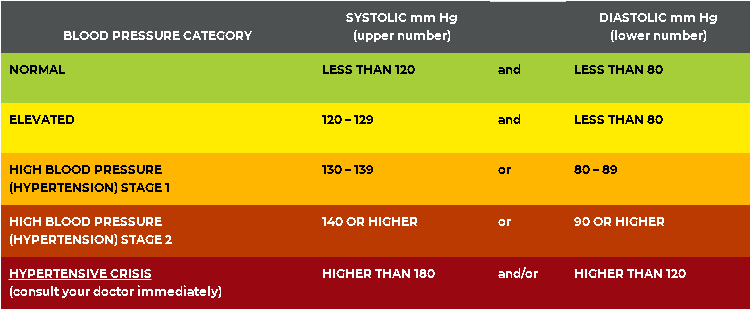

In [18]:
Image(filename='Imagens/blood pressure.png')

<h4>A seguir utilizaremos a função para identificar os outliers da coluna <font color = 'blue'><i>medicao_colesterol</i></font></h4>

In [19]:
df_out = fn_catching_outliers(df_heart_disease, 'medicao_colesterol')
df_out

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [20]:
## Verificar algumas estatisticas dos outliers 
df_out.describe()

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
count,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000
mean,62.600000,0.0,0.800000,135.800000,438.200000,0.200000,0.0,155.600000,0.200000,1.90000,1.200000,1.20000,2.600000,0.600000
std,4.159327,0.0,1.095445,12.969194,70.807485,0.447214,0.0,3.781534,0.447214,1.24499,0.447214,1.30384,0.547723,0.547723
min,56.000000,0.0,0.000000,115.000000,394.000000,0.000000,0.0,150.000000,0.000000,0.80000,1.000000,0.00000,2.000000,0.000000
25%,62.000000,0.0,0.000000,134.000000,407.000000,0.000000,0.0,154.000000,0.000000,1.20000,1.000000,0.00000,2.000000,0.000000
50%,63.000000,0.0,0.000000,140.000000,409.000000,0.000000,0.0,157.000000,0.000000,1.60000,1.000000,1.00000,3.000000,1.000000
75%,65.000000,0.0,2.000000,140.000000,417.000000,0.000000,0.0,157.000000,0.000000,1.90000,1.000000,2.00000,3.000000,1.000000
max,67.000000,0.0,2.000000,150.000000,564.000000,1.000000,0.0,160.000000,1.000000,4.00000,2.000000,3.00000,3.000000,1.000000


In [21]:
## Verificar algumas estatisticas dos 'valores normais' 
df_heart_disease.describe()

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<p>Existem 5 pacientes com o colesterol extremamente elevado, considerando a tabela abaixo e o que determina o <b> Journal of the American College of Cardiology (JACC)</b> os indices estão dentro dos padrões.
</p>        
<p><b>Fonte Tabela: </b>https://www.healthline.com/health/high-cholesterol/levels-by-age#adults </p>

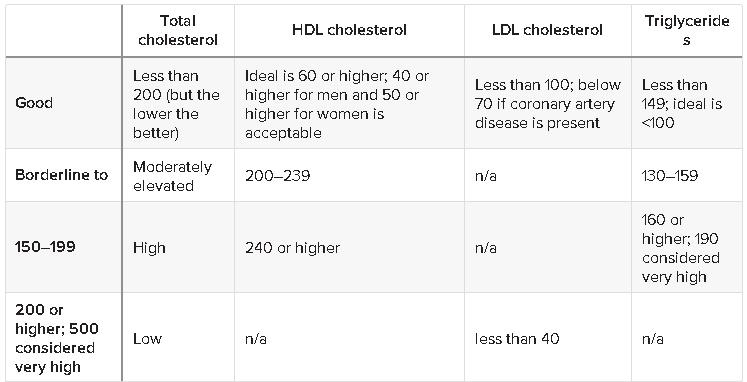

In [22]:
Image(filename = "Imagens/cholesterol_table.png")

<p>Dados os valores poderemos categorizar o nivel de colesterol mais a frente criando uma nova coluna.</p>


<h4>A seguir utilizaremos a função para identificar os outliers da coluna <font color = 'blue'><i>freq_cardiaca_max</i></font></h4>

In [23]:
df_out = fn_catching_outliers(df_heart_disease, 'freq_cardiaca_max')
df_out

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [24]:
## Verificar algumas estatisticas dos 'valores normais' 
df_heart_disease.describe()

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<p>Existe 1 paciente com a frequencia cardíaca muito baixa, considerando a tabela abaixo e o que determina a<b> Harvard Health Publishing</b> e a <b>American Hearth Association</b> os indices estão distantes dos padrões.
</p>        
<p><b>Fonte Tabela(1): </b> https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates</p>
<p><b>Fonte Tabela(2): </b> https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you </p>

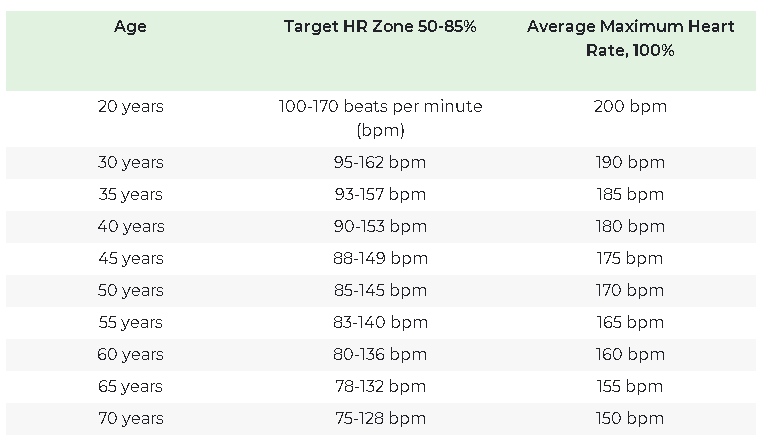

In [25]:
Image(filename = "Imagens/heart.png")

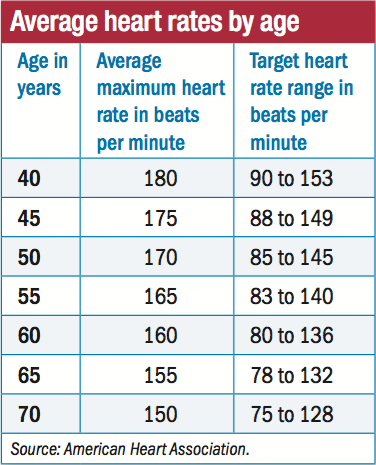

In [26]:
Image(filename = "Imagens/average-heart-rate.png")

<p>Nesse cenário a melhor opção é alterar o dado com base na média de sua idade.</p>

In [27]:
## Captar a media da idade e atribuí-la a linha e colunas onde esta o outlier
median = df_heart_disease.loc[(df_heart_disease['idade'] == 67), 'freq_cardiaca_max'].mean()
df_heart_disease.at[272, 'freq_cardiaca_max'] = median

<h4>A seguir utilizaremos a função para identificar os outliers da coluna <font color = 'blue'><i>depressao_st</i></font></h4>

In [28]:
df_out = fn_catching_outliers(df_heart_disease, 'depressao_st')
df_out

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [29]:
df_out['depressao_st'].describe()

count    5.000000
mean     4.920000
std      0.923038
min      4.200000
25%      4.200000
50%      4.400000
75%      5.600000
max      6.200000
Name: depressao_st, dtype: float64

In [30]:
df_heart_disease['depressao_st'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: depressao_st, dtype: float64

<p>Foram identificados 5 outliers correspondentes a coluna <b>depressao_st</b> alguns artigos informam que o valor normal dessa coluna, varia entre 0 a 1.5, todavia podem existir doenças ou mesmo causas, que façam esse valor ser maior que 5 por exemplo.</p>
<p>Como apenas um desses outliers determinou que o paciente possui uma doença cardíaca, seria interessante verificar se tal coluna possui alguma correlação com as demais, principalmente a variavel alvo, e caso não tenha poderemos removê-la.</p>

<p><b>Fonte Estudos: </b> https://pt.my-ekg.com/como-ler-ecg/segmento-st.html </p>

<h4>A seguir utilizaremos a função para identificar os outliers da coluna <font color = 'blue'><i>diturbio_talassemia</i></font></h4>

In [31]:
df_out = fn_catching_outliers(df_heart_disease, 'disturbio_talassemia')
df_out

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [32]:
df_heart_disease['disturbio_talassemia'].describe()

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: disturbio_talassemia, dtype: float64

<p>Foram encontrados 2 outliers relacionados a coluna <b>disturbio_talassemia</b>, Sendo que as Talassemias são um grupo de doenças hereditárias que se caracterizam pela redução ou ausência de hemoglobina.</p>

<p>Os outliers possuem valores zerados nesse campo, sendo que o comum é variarem de 2 a 3. Será preciso ver o grau de correlação dessa variável, para saber o que fazer com esses outliers</p>

<h4>A seguir utilizaremos a função para identificar os outliers da coluna <font color = 'blue'><i>num_navios_principais</i></font></h4>


In [33]:
df_out = fn_catching_outliers(df_heart_disease, 'num_navios_principais')
df_out.head(5)

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1


<p>Foram encontrados 2 outliers relacionados a coluna <b>num_navios_principais</b>, sendo que apenas com essa informação, principalmente a relacionada a coluna, não foi possivel localizar nenhum artigo que tenha relação com navios e coração. Sendo assim mantemos esse outlier, a depender do seu grau de correlação, poderemos atualizá-lo para a mediana dos valores</p>

<h4>A seguir utilizaremos a função para identificar os outliers da coluna <font color = 'blue'><i>acucar_sangue_jejum</i></font></h4>

In [34]:
df_out = fn_catching_outliers(df_heart_disease, 'acucar_sangue_jejum')
df_out.head(5)

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1


In [35]:
## Verificando as estatísticas dos outliers
df_out['acucar_sangue_jejum'].describe()

count    45.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: acucar_sangue_jejum, dtype: float64

In [36]:
## Verificando as estatísticas gerais
df_heart_disease['acucar_sangue_jejum'].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: acucar_sangue_jejum, dtype: float64

In [37]:
## Quantidade de valores na coluna 'acucar_sangue_jejum'
df_heart_disease['acucar_sangue_jejum'].value_counts()

0    258
1     45
Name: acucar_sangue_jejum, dtype: int64

<p>Foram encontrados 45 outliers relacionados a coluna <b>acucar_sangue_jejum</b>, e ao que tudo indica eles são outliers por que a maior parte dos dados é igual a 0 (ZERO), logo a existencia desses outliers é justificável.</p>

<p>A partir daqui veremos as correlação entre todas as variáveis para identificar o que poderíamos fazer com os outliers, para isso usaremos uma função pronta</p>

In [38]:
def fn_plot_heatmap_correlation_dataframe(p_df_python, 
                                          p_mascara = True, 
                                          p_rotacao_eixo_x = 0, 
                                          p_rotacao_eixo_y = 0):
    """
    Description: Função que gera um heatmap sobre a correlação das varáveis em um dado Pandas Dataframe

    Args: *p_df_python - Dataframe Python
          *p_mascara - determina se será necerrario utilizar uma mascara 
                    ocultando as celulas 'repetidas' e as pertencentes a diagonal
          *p_rotacao_eixo_x - Rotaciona em x graus o eixo das abcissas no gráfico
          *p_rotacao_eixo_y - Rotaciona em x graus o eixo das ordenadas no gráfico

    Return: A plotagem de um heatmap.

    Exception: None

    """
    # Dataframe apenas com valores numéricos
    df_correlacao = p_df_python[p_df_python.select_dtypes(exclude=['object']).columns].corr()
  
    # Criar a mascara que mostrara apenas a correlação das variaveis sem repetição e sem a informação dad iagonal
    mask_pk = np.zeros_like(df_correlacao, dtype = np.bool)
    mask_pk[np.triu_indices_from(mask_pk)] = True
  
    # Verificar se sera necessario exibir essa mascara
    if p_mascara == False:
        mask_pk = None
    
    # Criar figura
    plt.figure(figsize = (22, 15))
  
    # Criara o heatmap
    heat_map = sns.heatmap(df_correlacao, 
                         vmin = -1, 
                         cmap = 'coolwarm',
                         annot = True,
                         mask = mask_pk)
  
    # Estabelecer eixos da figura
    heat_map.set_xticklabels(heat_map.get_xticklabels(), 
                           rotation = p_rotacao_eixo_x)
    
    heat_map.set_yticklabels(heat_map.get_yticklabels(), 
                           rotation = p_rotacao_eixo_y)
    
    # Ajustar os eixos X e Y do gráfico
    bottom, top = heat_map.get_ylim()
    heat_map.set_ylim(bottom + 0.5, top - 0.5)
    
    # Tamanho das Fontes
    heat_map.tick_params(labelsize= 12)
    
    # Nome do dataframe declarado
    none_df =[x for x in globals() 
                  if globals()[x] is p_df_python][0]
    
    # Titulo do gráfico
    plt.title("Correlação das variaveis do objeto: {}".format(none_df), 
              fontdict = {'fontsize' : 20})
    
    plt.show()

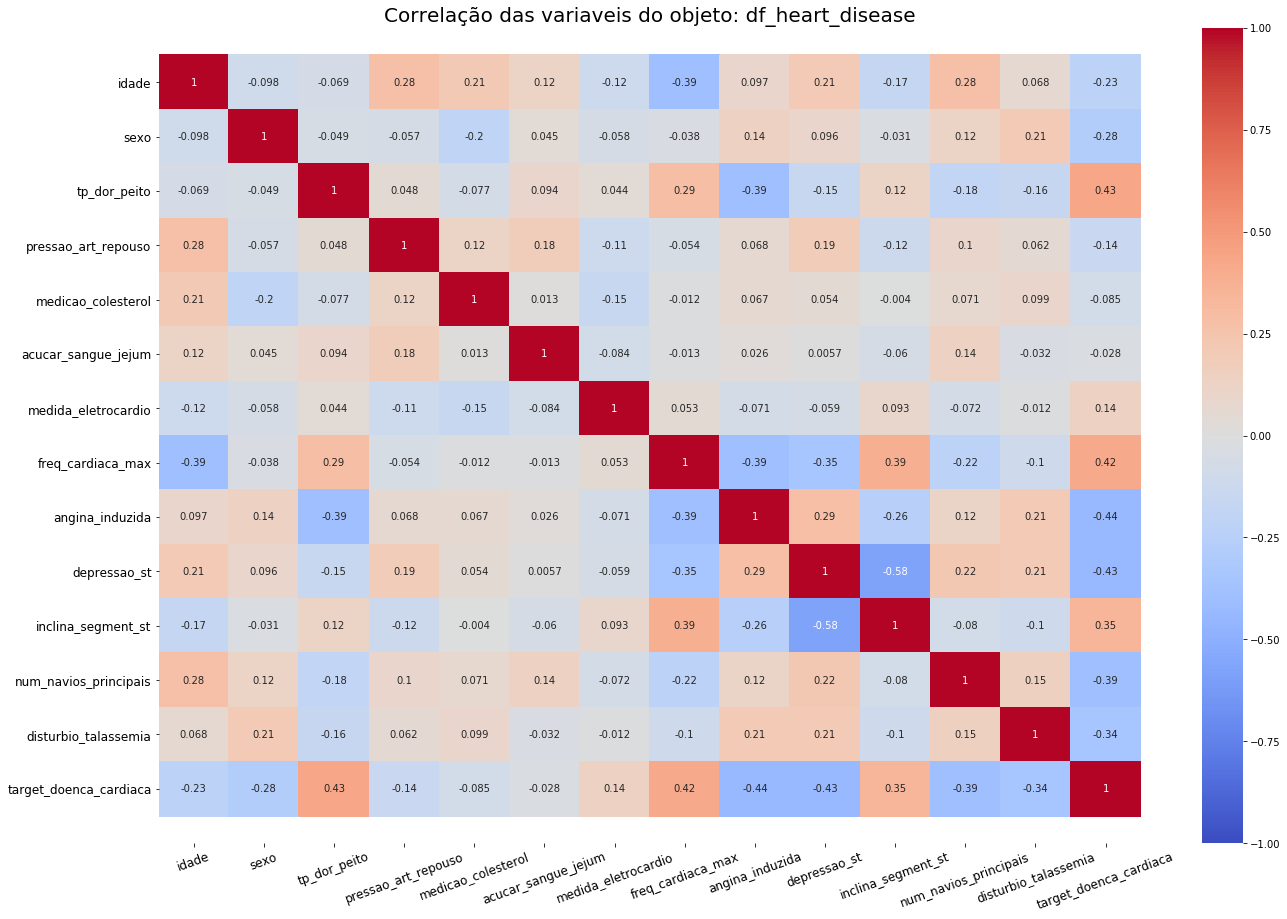

In [39]:
fn_plot_heatmap_correlation_dataframe(df_heart_disease, False, 20)

<p>Com o auxilio do gráfico acima, temos uma ideia das correlações entre algumas variáveis dentre elas as que possuem outliers e que concordamos e trabalhar a partir daqui.</p>
<p>Variáveis com Outliers, que ainda não foram tratadas: <b>pressao_art_repouso, medicao_colesterol, depressao_st, disturbio-talassemia, num_navios_principais, acucar_sangue_jejum</b></p>

<p>'De cara' é possível constatar:
    <ol>
        <ul>Que a variavel acucar_sangue_jejum é categórica;</ul>
        <ul>As variaveis pressao_art_repouso e medicao_colesterol, possuem uma correlação baixa com outras variáveis, e seri interessante que fossem geradas novas colunas classificando suas respectivas informações, o que seria muito bom para alguns gráficos e posteriores analises;</ul>
        <ul>A depressao_at possui correlações interessantes com algumas colunas, seria bom verificar se esse grau de correlação poderia ser melhorado substituindo os outliers, ou mesmo removendo-os;</ul>
        <ul>A variavel disturbio_talassemia possui uma correlação ligeiramente elvada com a variavel alvo, seria interessante atualizar seus valores para a media e verificar se a correlação melhora. Esse mesmo cenário é observado na variável num_navios_principais.</ul>
    </ol>
</p>

In [40]:
## Verificando a correlação atual da coluna 'num_navios_principais'
df_heart_disease.corr().loc[['num_navios_principais', 'disturbio_talassemia'],:]

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
num_navios_principais,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.224048,0.115739,0.222682,-0.080155,1.000000,0.151832,-0.391724
disturbio_talassemia,0.068001,0.210041,-0.161736,0.062210,0.098803,-0.032019,-0.011981,-0.103143,0.206754,0.210244,-0.104764,0.151832,1.000000,-0.344029


In [41]:
## Aplicando a mediana aos outliers das colunas 'num_navios_principais' e 'disturbio_talassemia'

# Captando a mediana de do dataframe original
median = df_heart_disease[['num_navios_principais', 'disturbio_talassemia']].median()

## Coluna 'num_navios_principais' #########################

# Captando os outliers e armazenando em um dataframe
df_out = fn_catching_outliers(df_heart_disease, 'num_navios_principais')

# Aplicando a médiana 
df_heart_disease.at[df_out.index.values, 'num_navios_principais'] = median['num_navios_principais'] 

## Coluna 'disturbio_talassemia' #########################

# Captando os outliers e armazenando em um dataframe
df_out = fn_catching_outliers(df_heart_disease, 'disturbio_talassemia')

# Aplicando a médiana 
df_heart_disease.at[df_out.index.values, 'disturbio_talassemia'] = median['disturbio_talassemia'] 

# Verificando a 'nova' correlação das colunas 'num_navios_principais', 'disturbio_talassemia'

df_heart_disease.corr().loc[['num_navios_principais', 'disturbio_talassemia'], :]

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
num_navios_principais,0.316359,0.036865,-0.187366,0.048280,0.067023,0.105819,-0.084094,-0.176303,0.178502,0.197840,-0.032687,1.000000,0.111749,-0.391731
disturbio_talassemia,0.066745,0.211652,-0.169125,0.060638,0.087866,-0.011209,-0.013795,-0.122837,0.225508,0.210236,-0.106310,0.111749,1.000000,-0.363322


<p>É possível detectar uma leve melhora na correlação entre algumas variáveis após esse ajuste, principalmente em relação a variável alvo 'target_doenca_cardiaca'.</p>

<p>Agora iremos aplicar a mesma metodologia a coluna <b>depressao_st</b></p>

In [42]:
fn_catching_outliers(df_heart_disease, 'depressao_st')

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
101,59,1,3,178,270,0,0,145,0,4.2,0,0.0,3.0,1
204,62,0,0,160,164,0,0,145,0,6.2,0,0.0,3.0,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0.0,3.0,0
250,51,1,0,140,298,0,1,122,1,4.2,1,0.0,3.0,0
291,58,1,0,114,318,0,2,140,0,4.4,0,0.0,1.0,0


In [43]:
df_heart_disease.corr().loc[['depressao_st'], :]

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
depressao_st,0.210013,0.096093,-0.14923,0.193216,0.053952,0.005747,-0.05877,-0.351199,0.288223,1.0,-0.577537,0.19784,0.210236,-0.430696


In [44]:
## Aplicando a mediana aos outliers da coluna 'depressao_st'

# Captando a mediana de do dataframe original
median = df_heart_disease['depressao_st'].median()

# Captando os outliers e armazenando em um dataframe
df_out = fn_catching_outliers(df_heart_disease, 'depressao_st')

# Aplicando a médiana 
df_heart_disease.at[df_out.index.values, 'depressao_st'] = median

df_heart_disease.corr().loc[['depressao_st'], :]

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
depressao_st,0.212629,0.099479,-0.136476,0.158153,0.064457,0.033728,-0.092896,-0.340794,0.311499,1.0,-0.512872,0.26371,0.198086,-0.430495


<p>Agora iremos verificar se ainda restam outliers no dataframe, exlcuindo é claro as colunas <b> medicao_colesterol e acucar_sangue_jejum</b> que terão um tratamento diferente e/ou são categóricas</p>

In [45]:
## Verificar os outliers
fn_number_of_outliers_per_dataframe(df_heart_disease)

idade                      0
sexo                       0
tp_dor_peito               0
pressao_art_repouso        9
medicao_colesterol         5
acucar_sangue_jejum       45
medida_eletrocardio        0
freq_cardiaca_max          0
angina_induzida            0
depressao_st               0
inclina_segment_st         0
num_navios_principais      0
disturbio_talassemia       0
target_doenca_cardiaca     0
dtype: int64

<h3>Criar novas variáveis no Dataframe</h3>

<p>Iremos nesse primeiro momento criar algumas variáveis, principalmente para as colunas 'medicao_colesterol'</p>

In [46]:
## Funções de Apoio
def cholesterol_measurement(p_measurement):
    """
        Description:
            Função que classifica o colesterol total de alguem

        Keyword arguments:
            p_measurement -- Valor do colesterol total

        Return:
            Retrorna a classificação do valor passado

        Exception:
            None
    """
    if p_measurement <= 200:
        return 'Desirable'
    elif p_measurement <= 239:
        return 'Boderline High'
    elif p_measurement <= 199:
        return 'High'
    else:
        return 'Very High'

In [47]:
## Coluna 'medicao_colesterol'

df_heart_disease['classif_colesterol'] = df_heart_disease['medicao_colesterol'].apply(cholesterol_measurement)

In [48]:
## Verificar a distribuição do colesterol ao longo do dataframe
df_heart_disease['classif_colesterol'].value_counts()

Very High         155
Boderline High     97
Desirable          51
Name: classif_colesterol, dtype: int64

<h3>Verificar a correlação e distribuição dos dados.</h3>

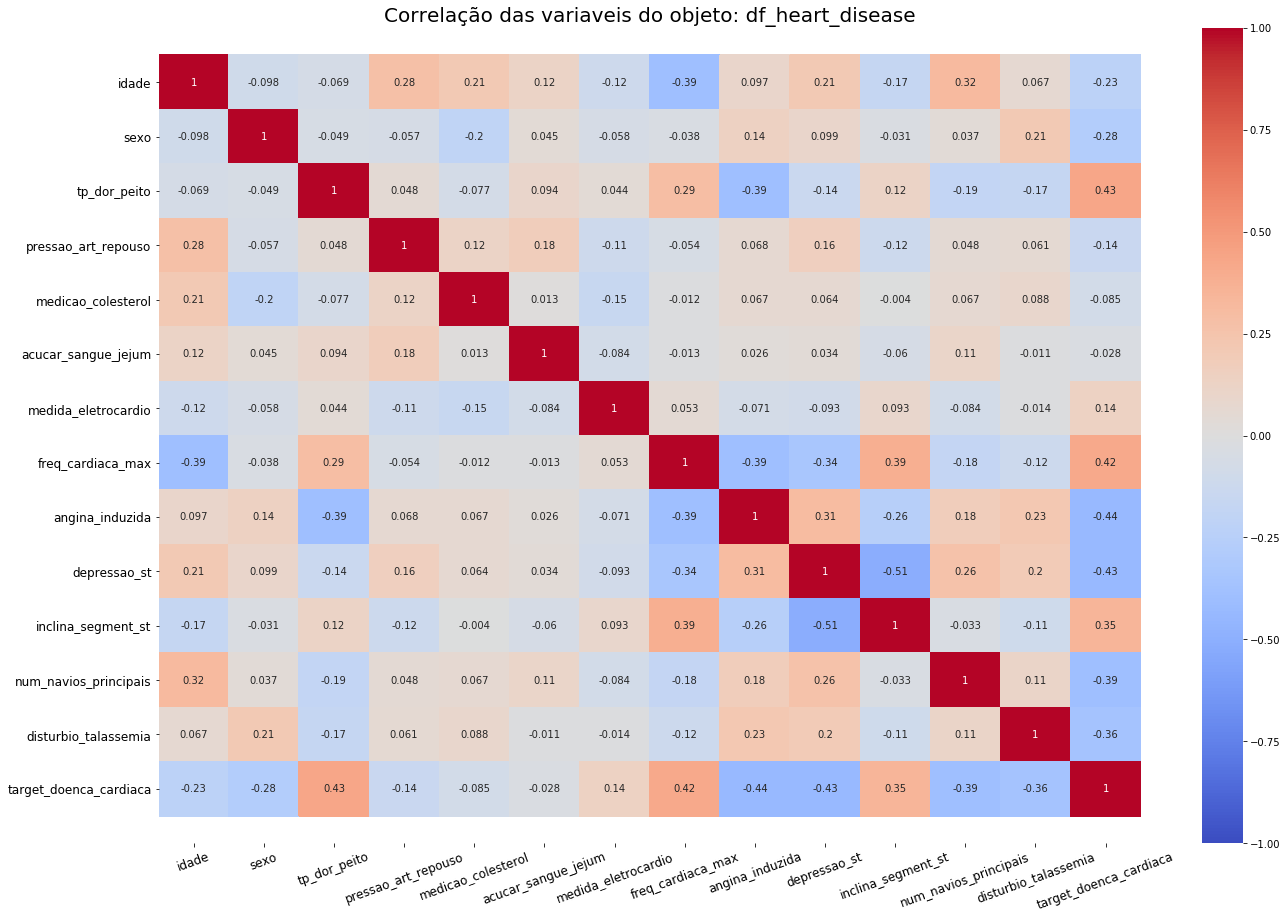

In [49]:
## Verificando a correlação das variáveis
fn_plot_heatmap_correlation_dataframe(df_heart_disease, False, 20)

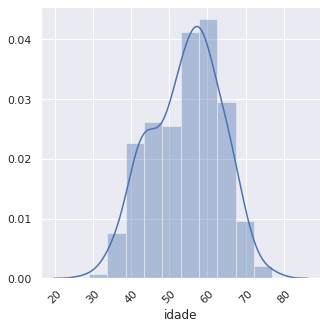

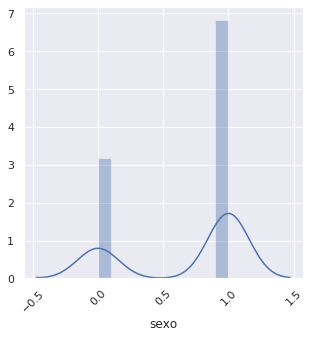

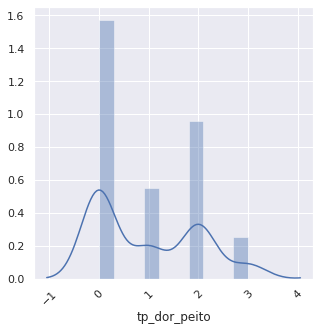

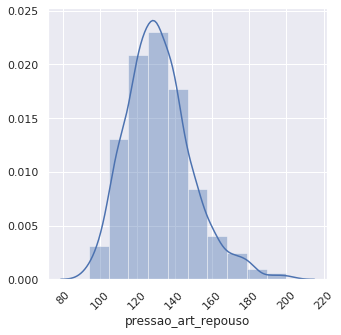

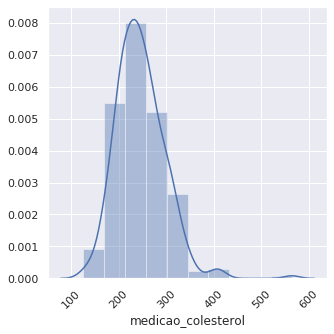

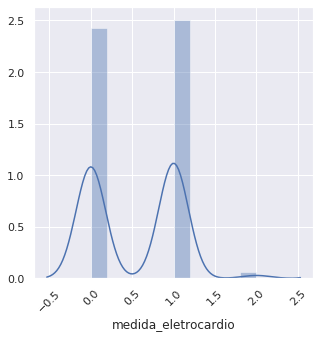

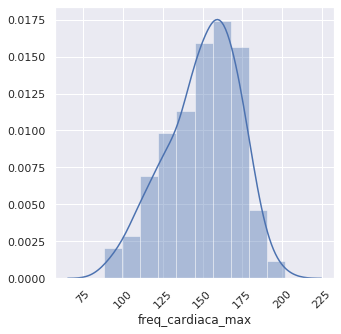

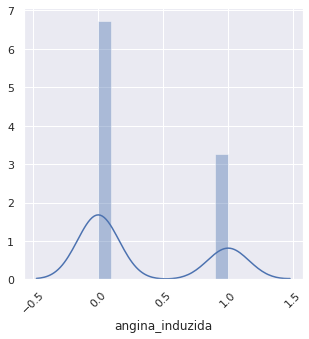

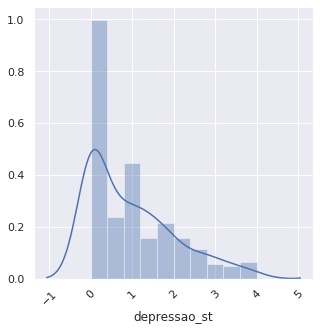

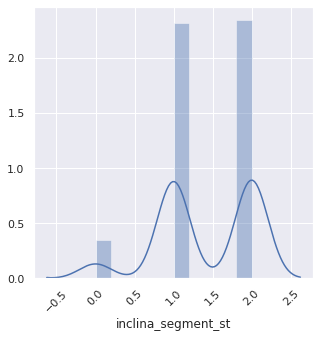

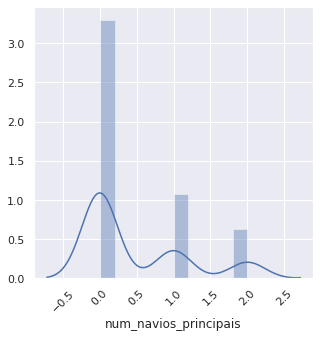

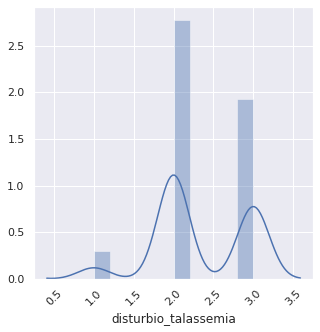

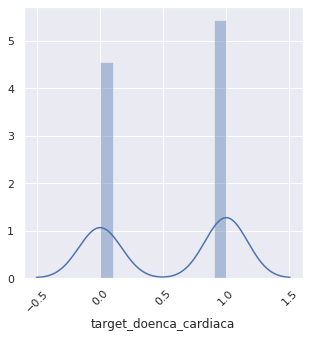

In [50]:
## Verificando a disribuição dos dados utilizando um histograma
sns.set( rc = {'figure.figsize': (5, 5)})

fnum = ['idade', 'sexo', 'tp_dor_peito', 'pressao_art_repouso', 'medicao_colesterol',
        'medida_eletrocardio','freq_cardiaca_max', 'angina_induzida', 'depressao_st', 'inclina_segment_st',
        'num_navios_principais', 'disturbio_talassemia', 'target_doenca_cardiaca']

for col in fnum:
    plt.figure()
    sns.distplot(df_heart_disease[col], bins=10)
    plt.xticks(rotation=45)
    plt.show()

In [51]:
df_heart_disease['classif_colesterol'].value_counts()

Very High         155
Boderline High     97
Desirable          51
Name: classif_colesterol, dtype: int64

<h3>Realizar o processo de 'dummies'</h3>
<p>A variaveis com características 'categóricas' no dataframe são: <b>classif_colesterol</b></p>

In [52]:
## Gerando variáveis dummies
# Colunas

columns = ['classif_colesterol']

dum = pd.get_dummies(df_heart_disease, 
                     columns = ['classif_colesterol'],
                     drop_first = False, 
                     prefix = ['classif_colesterol'],
                     prefix_sep = '_')
df_heart_disease_treat = dum

In [53]:
df_heart_disease.isnull().any(axis=0) 

idade                     False
sexo                      False
tp_dor_peito              False
pressao_art_repouso       False
medicao_colesterol        False
acucar_sangue_jejum       False
medida_eletrocardio       False
freq_cardiaca_max         False
angina_induzida           False
depressao_st              False
inclina_segment_st        False
num_navios_principais     False
disturbio_talassemia      False
target_doenca_cardiaca    False
classif_colesterol        False
dtype: bool

<h3>Selecionar as variáveis<h3>

In [54]:
# Variável Dependente
Var_resp = df_heart_disease_treat["target_doenca_cardiaca"]
# Variáveis Independentes
expl = df_heart_disease_treat.drop(columns='target_doenca_cardiaca')

<h3>Separando as bases em Treino e Teste</h3>

In [55]:
x_all = expl
y_all = Var_resp

x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size = 0.3 ,random_state = 456)

print('Numero de observaçoes do treino:{} \nNumero de observaçoes da teste:{}'.format(len(x_train),len(x_test)))

Numero de observaçoes do treino:212 
Numero de observaçoes da teste:91


In [56]:
## Veificar a distribuição da variável alvo nas bases
print(y_train.value_counts() / len(y_train))
print()
print(y_test.value_counts() / len(y_test))

1    0.542453
0    0.457547
Name: target_doenca_cardiaca, dtype: float64

1    0.549451
0    0.450549
Name: target_doenca_cardiaca, dtype: float64


<p>Aparentemente a distribuição dos dados esta congruente. Agora iniciamos o processo de avaliar os modelos gerados.</p>

<h3>Aplicando os modelos de machine learning</h3>

<h4>Modelo <font color = 'red'>Gaussian Naive Bayes</font></h4>

In [57]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

# Treino
y_pred_gaussian_train = gaussian.predict(x_train)
y_score_gaussian_train = gaussian.predict_proba(x_train)

# Teste
y_pred_gaussian_test = gaussian.predict(x_test)
y_score_gaussian_test = gaussian.predict_proba(x_test)

In [58]:
## Acuracia do modelo

#Treino
acc_gaussian_train = round(accuracy_score(y_pred_gaussian_train, y_train) * 100, 2)

#Teste
acc_gaussian_test = round(accuracy_score(y_pred_gaussian_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini

# Treino
fpr_gaussian_train, tpr_gaussian_train, thresholds = roc_curve(y_train, y_score_gaussian_train[:,1])
roc_auc_gaussian_train = 100*round(auc(fpr_gaussian_train, tpr_gaussian_train), 2)
gini_gaussian_train = 100*round((2*roc_auc_gaussian_train/100 - 1), 2)

# Teste
fpr_gaussian_test, tpr_gaussian_test, thresholds = roc_curve(y_test, y_score_gaussian_test[:,1])
roc_auc_gaussian_test = 100*round(auc(fpr_gaussian_test, tpr_gaussian_test), 2)
gini_gaussian_test = 100*round((2*roc_auc_gaussian_test/100 - 1), 2)

print('----BASE TREINO----\nAcurácia: {} \nGini: {} \nÁrea Curva ROC: {}'.format(acc_gaussian_train, \
                                                                                 gini_gaussian_train, \
                                                                                 roc_auc_gaussian_train))

print('\n----BASE TESTE----\nAcurácia: {} \nGini: {} \nÁrea Curva ROC: {}'.format(acc_gaussian_test, \
                                                                                  gini_gaussian_test, \
                                                                                  roc_auc_gaussian_test))

----BASE TREINO----
Acurácia: 86.79 
Gini: 84.0 
Área Curva ROC: 92.0

----BASE TESTE----
Acurácia: 86.81 
Gini: 84.0 
Área Curva ROC: 92.0


<h4>Modelo <font color = 'red'>Logistic Regression (Regressão Logística)</font></h4>

In [59]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)


# Treino
y_pred_logreg_train = logreg.predict(x_train)
y_score_logreg_train = logreg.predict_proba(x_train)

# Teste
y_pred_logreg_test = logreg.predict(x_test)
y_score_logreg_test = logreg.predict_proba(x_test)

/home/joao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [60]:
#Treino
acc_logreg_train = round(accuracy_score(y_pred_logreg_train, y_train) * 100, 2)

#Teste
acc_logreg_test = round(accuracy_score(y_pred_logreg_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini

# Treino
fpr_logreg_train, tpr_logreg_train, thresholds = roc_curve(y_train, y_score_logreg_train[:,1])
roc_auc_logreg_train = 100*round(auc(fpr_logreg_train, tpr_logreg_train), 2)
gini_logreg_train = 100*round((2*roc_auc_logreg_train/100 - 1), 2)

# Teste
fpr_logreg_test, tpr_logreg_test, thresholds = roc_curve(y_test, y_score_logreg_test[:,1])
roc_auc_logreg_test = 100*round(auc(fpr_logreg_test, tpr_logreg_test), 2)
gini_logreg_test = 100*round((2*roc_auc_logreg_test/100 - 1), 2)

print('----BASE TREINO----\nAcurácia: {} \nGini: {} \nÁrea Curva ROC: {}'.format(acc_logreg_train, \
                                                                                 gini_logreg_train, \
                                                                                 roc_auc_logreg_train))

print('\n----BASE TESTE----\nAcurácia: {} \nGini: {} \nÁrea Curva ROC: {}'.format(acc_logreg_test, \
                                                                                  gini_logreg_test, \
                                                                                  roc_auc_logreg_test))

----BASE TREINO----
Acurácia: 87.74 
Gini: 86.0 
Área Curva ROC: 93.0

----BASE TESTE----
Acurácia: 83.52 
Gini: 84.0 
Área Curva ROC: 92.0


<h4>Modelo <font color = 'red'>Support Vector Machine</font></h4>

In [61]:
svc = SVC()

svc.fit(x_train, y_train)

# Treino
y_pred_svc_train = svc.predict(x_train)
#Converte para probabilidade
y_score_svc_train = 1/(1+np.exp(-svc.decision_function(x_train)))

# Teste
y_pred_svc_test = svc.predict(x_test)
#Converte para probabilidade
y_score_svc_test = 1/(1+np.exp(-svc.decision_function(x_test)))

In [62]:
# 1) Cálculo da acurácia

#Treino
acc_svc_train = round(accuracy_score(y_pred_svc_train, y_train) * 100, 2)

#Teste
acc_svc_test = round(accuracy_score(y_pred_svc_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini

# Treino
fpr_svc_train, tpr_svc_train, thresholds = roc_curve(y_train, y_score_svc_train)
roc_auc_svc_train = 100*round(auc(fpr_svc_train, tpr_svc_train), 2)
gini_svc_train = 100*round((2*roc_auc_svc_train/100 - 1), 2)

# Teste
fpr_svc_test, tpr_svc_test, thresholds = roc_curve(y_test, y_score_svc_test)
roc_auc_svc_test = 100*round(auc(fpr_svc_test, tpr_svc_test), 2)
gini_svc_test = 100*round((2*roc_auc_svc_test/100 - 1), 2)

print('----BASE TREINO----\nAcurácia: {} \nGini: {} \nÁrea Curva ROC: {}'.format(acc_svc_train, \
                                                                                 gini_svc_train, \
                                                                                 roc_auc_svc_train))

print('\n----BASE TESTE----\nAcurácia: {} \nGini: {} \nÁrea Curva ROC: {}'.format(acc_svc_test, \
                                                                                  gini_svc_test, \
                                                                                  roc_auc_svc_test))

----BASE TREINO----
Acurácia: 65.09 
Gini: 48.0 
Área Curva ROC: 74.0

----BASE TESTE----
Acurácia: 72.53 
Gini: 56.00000000000001 
Área Curva ROC: 78.0


<h4>Modelo <font color = 'red'>Decision Tree</font></h4>

In [63]:
dectree = DecisionTreeClassifier(criterion = 'entropy',
                                 max_depth = 5,
                                 random_state = 789)
dectree.fit(x_train, y_train)


# Treino
y_pred_dectree_train = dectree.predict(x_train)
y_score_dectree_train = dectree.predict_proba(x_train)[:,1]

# Teste
y_pred_dectree_test = dectree.predict(x_test)
y_score_dectree_test = dectree.predict_proba(x_test)[:,1]

In [64]:
# 1) Cálculo da acurácia
from sklearn.metrics import accuracy_score

#Treino
acc_dectree_train = round(accuracy_score(y_pred_dectree_train, y_train) * 100, 2)

#Teste
acc_dectree_test = round(accuracy_score(y_pred_dectree_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini
from sklearn.metrics import roc_curve, auc

# Treino
fpr_dectree_train, tpr_dectree_train, thresholds = roc_curve(y_train, y_score_dectree_train)
roc_auc_dectree_train = 100*round(auc(fpr_dectree_train, tpr_dectree_train), 2)
gini_dectree_train = 100*round((2*roc_auc_dectree_train/100 - 1), 2)

# Teste
fpr_dectree_test, tpr_dectree_test, thresholds = roc_curve(y_test, y_score_dectree_test)
roc_auc_dectree_test = 100*round(auc(fpr_dectree_test, tpr_dectree_test), 2)
gini_dectree_test = 100*round((2*roc_auc_dectree_test/100 - 1), 2)

print('----BASE TREINO----\nAcurácia: {} \nGini: {} \nÁrea Curva ROC: {}'.format(acc_dectree_train, \
                                                                                 gini_dectree_train, \
                                                                                 roc_auc_dectree_train))

print('\n----BASE TESTE----\nAcurácia: {} \nGini: {} \nÁrea Curva ROC: {}'.format(acc_dectree_test, \
                                                                                  gini_dectree_test, \
                                                                                  roc_auc_dectree_test))

----BASE TREINO----
Acurácia: 93.87 
Gini: 98.0 
Área Curva ROC: 99.0

----BASE TESTE----
Acurácia: 75.82 
Gini: 60.0 
Área Curva ROC: 80.0


<p>A poda da arvore foi testada com n valores possíveis, e o que teve melhor rendimento em ambas as bases considerando a entropia, foi uma <b>poda de nivel 5</b></p>

<h4>Modelo <font color = 'red'>Random Forest</font></h4>

In [65]:
from sklearn.ensemble import RandomForestClassifier


rndforest = RandomForestClassifier(criterion='entropy',
                                 max_depth=4,
                                 random_state=987)

rndforest.fit(x_train, y_train)

# Treino
y_pred_rndforest_train = rndforest.predict(x_train)
y_score_rndforest_train = rndforest.predict_proba(x_train)[:,1]

# Teste
y_pred_rndforest_test = rndforest.predict(x_test)
y_score_rndforest_test = rndforest.predict_proba(x_test)[:,1]

In [66]:
# 1) Cálculo da acurácia

#Treino
acc_rndforest_train = round(accuracy_score(y_pred_rndforest_train, y_train) * 100, 2)

#Teste
acc_rndforest_test = round(accuracy_score(y_pred_rndforest_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini

# Treino
fpr_rndforest_train, tpr_rndforest_train, thresholds = roc_curve(y_train, y_score_rndforest_train)
roc_auc_rndforest_train = 100*round(auc(fpr_rndforest_train, tpr_rndforest_train), 2)
gini_rndforest_train = 100*round((2*roc_auc_rndforest_train/100 - 1), 2)

# Teste
fpr_rndforest_test, tpr_rndforest_test, thresholds = roc_curve(y_test, y_score_rndforest_test)
roc_auc_rndforest_test = 100*round(auc(fpr_rndforest_test, tpr_rndforest_test), 2)
gini_rndforest_test = 100*round((2*roc_auc_rndforest_test/100 - 1), 2)

print('----BASE TREINO----\nAcurácia: {} \nGini: {} \nÁrea Curva ROC: {}'.format(acc_rndforest_train, \
                                                                                 gini_rndforest_train, \
                                                                                 roc_auc_rndforest_train))

print('\n----BASE TESTE----\nAcurácia: {} \nGini: {} \nÁrea Curva ROC: {}'.format(acc_rndforest_test, \
                                                                                  gini_rndforest_test, \
                                                                                  roc_auc_rndforest_test))

----BASE TREINO----
Acurácia: 91.04 
Gini: 96.0 
Área Curva ROC: 98.0

----BASE TESTE----
Acurácia: 84.62 
Gini: 86.0 
Área Curva ROC: 93.0


<h4>Modelo <font color = 'red'>Gradient Boosting Classifier</font></h4>

In [67]:
gbc = GradientBoostingClassifier(min_samples_leaf = 48)

gbc.fit(x_train, y_train)

# Treino
y_pred_gbc_train = gbc.predict(x_train)
y_score_gbc_train = gbc.predict_proba(x_train)[:,1]

# Teste
y_pred_gbc_test = gbc.predict(x_test)
y_score_gbc_test = gbc.predict_proba(x_test)[:,1]

In [68]:
# 1) Cálculo da acurácia

#Treino
acc_gbc_train = round(accuracy_score(y_pred_gbc_train, y_train) * 100, 2)

#Teste
acc_gbc_test = round(accuracy_score(y_pred_gbc_test, y_test) * 100, 2)

# 2) Cálculo da área sob curva ROC e Gini

# Treino
fpr_gbc_train, tpr_gbc_train, thresholds = roc_curve(y_train, y_score_gbc_train)
roc_auc_gbc_train = 100*round(auc(fpr_gbc_train, tpr_gbc_train), 2)
gini_gbc_train = 100*round((2*roc_auc_gbc_train/100 - 1), 2)

# Teste
fpr_gbc_test, tpr_gbc_test, thresholds = roc_curve(y_test, y_score_gbc_test)
roc_auc_gbc_test = 100*round(auc(fpr_gbc_test, tpr_gbc_test), 2)
gini_gbc_test = 100*round((2*roc_auc_gbc_test/100 - 1), 2)

print('----BASE TREINO----\nAcurácia: {} \nGini: {} \nÁrea Curva ROC: {}'.format(acc_gbc_train, \
                                                                                 gini_gbc_train, \
                                                                                 roc_auc_gbc_train))
print('\n----BASE TESTE----\nAcurácia: {} \nGini: {} \nÁrea Curva ROC: {}'.format(acc_gbc_test, \
                                                                                  gini_gbc_test, \
                                                                                  roc_auc_gbc_test))

----BASE TREINO----
Acurácia: 91.04 
Gini: 94.0 
Área Curva ROC: 97.0

----BASE TESTE----
Acurácia: 86.81 
Gini: 84.0 
Área Curva ROC: 92.0


<h3>Avaliando os modelos</h3>

In [69]:
models = pd.DataFrame({
    'Modelo': ['Decision Tree', 
               'Random Forest', 
               'Gradient Boosting',
               'Support Vector Machine(SVM)',
               'Logistic Regression',
               'Gaussian Naive Bayes'],
    
     'Acuracia de Treino': [acc_dectree_train,
                         acc_rndforest_train,
                         acc_gbc_train,
                         acc_svc_train,
                         acc_logreg_train, 
                         acc_gaussian_train],   
    
    
    'Acuracia de Teste': [acc_dectree_test,
                       acc_rndforest_test,
                       acc_gbc_test,
                       acc_svc_test,
                       acc_logreg_test,
                       acc_gaussian_test]

})
model_comp = models.sort_values(by = 'Acuracia de Teste', 
                                ascending = False)
model_comp = model_comp[['Modelo','Acuracia de Treino','Acuracia de Teste']]
model_comp

,Modelo,Acuracia de Treino,Acuracia de Teste
2,Gradient Boosting,91.04,86.81
5,Gaussian Naive Bayes,86.79,86.81
1,Random Forest,91.04,84.62
4,Logistic Regression,87.74,83.52
0,Decision Tree,93.87,75.82
3,Support Vector Machine(SVM),65.09,72.53


<h3>Variáveis/ Colunas mais importantes por Modelo</h3>

<h4>Modelo <font color = 'red'>Gradient Boosting Classifier</font></h4>

In [70]:
df = pd.DataFrame(OrderedDict({'Variaveis':x_train.columns,
                               'Importancia - Gradient Boosting':gbc.feature_importances_}))

df = df.sort_values(by='Importancia - Gradient Boosting', ascending=False)

df.head(100)

,Variaveis,Importancia - Gradient Boosting
2,tp_dor_peito,0.325441
9,depressao_st,0.127468
12,disturbio_talassemia,0.126556
11,num_navios_principais,0.101456
10,inclina_segment_st,0.066556
0,idade,0.055193
7,freq_cardiaca_max,0.050425
1,sexo,0.050358
8,angina_induzida,0.049075
4,medicao_colesterol,0.025423


<h4>Modelo <font color = 'red'>Random Forest </font></h4>

In [71]:
df = pd.DataFrame(OrderedDict({'Variaveis':x_train.columns,
                               'Importancia - Random Forest':rndforest.feature_importances_}))
df = df.sort_values(by = 'Importancia - Random Forest', ascending = False)
df.head(100)

,Variaveis,Importancia - Random Forest
2,tp_dor_peito,0.186689
9,depressao_st,0.134714
7,freq_cardiaca_max,0.118564
12,disturbio_talassemia,0.106324
8,angina_induzida,0.084176
0,idade,0.072203
11,num_navios_principais,0.059623
10,inclina_segment_st,0.058201
4,medicao_colesterol,0.052610
1,sexo,0.047533


<h4>Modelo <font color = 'red'>Decision Tree</font></h4>

In [72]:
df = pd.DataFrame(OrderedDict({'Variaveis':x_train.columns,'Importancia':dectree.feature_importances_}))
df = df.sort_values(by='Importancia', ascending=False)
df.head(100)

,Variaveis,Importancia
2,tp_dor_peito,0.269337
0,idade,0.154697
9,depressao_st,0.141524
11,num_navios_principais,0.096615
12,disturbio_talassemia,0.073938
6,medida_eletrocardio,0.047664
13,classif_colesterol_Boderline High,0.039823
4,medicao_colesterol,0.037178
5,acucar_sangue_jejum,0.034646
3,pressao_art_repouso,0.033160


<h3>Aplicar os dados aos modelos, gerando graficos</h3>

In [73]:
plot = pd.read_csv('heart.csv')

plot['heart_disease'] = np.where(plot['target'] == 1, 'Positive', 'Negative')

tar = plot['heart_disease']

<h4>Modelo <font color = 'red'>Random Forest</font></h4>

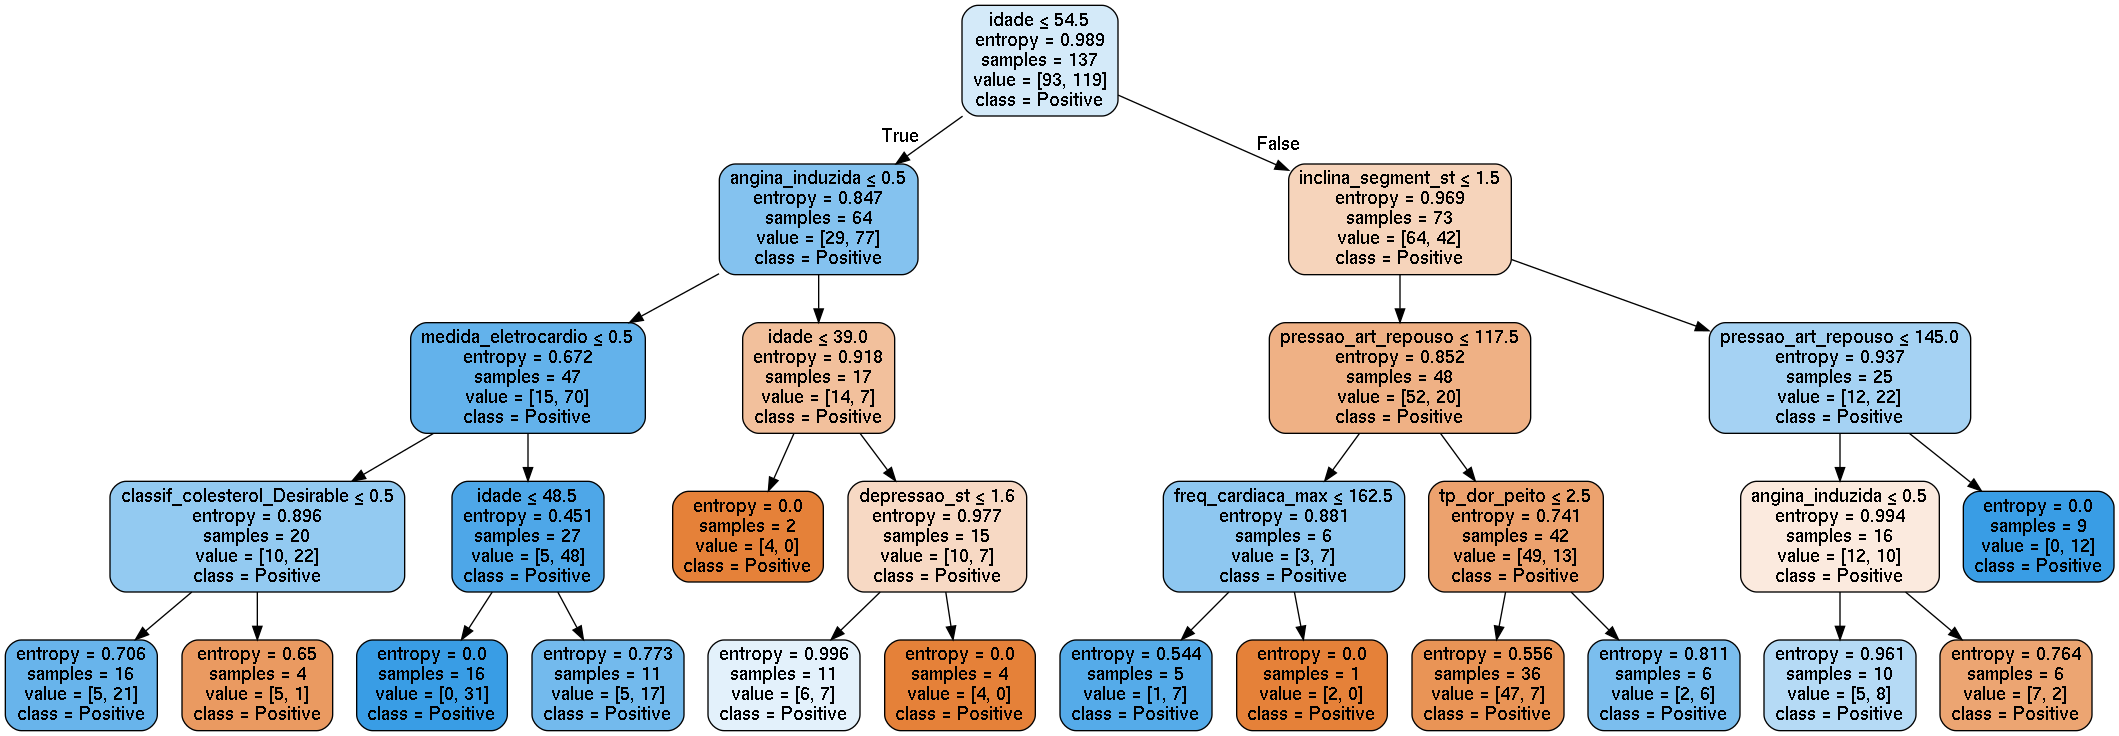

In [74]:
estimator = rndforest.estimators_[5]
dot_data = StringIO()
export_graphviz(estimator, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True,
                feature_names = expl.columns,
                class_names = tar)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<h4>Modelo <font color = 'red'>Decision Tree</font></h4>

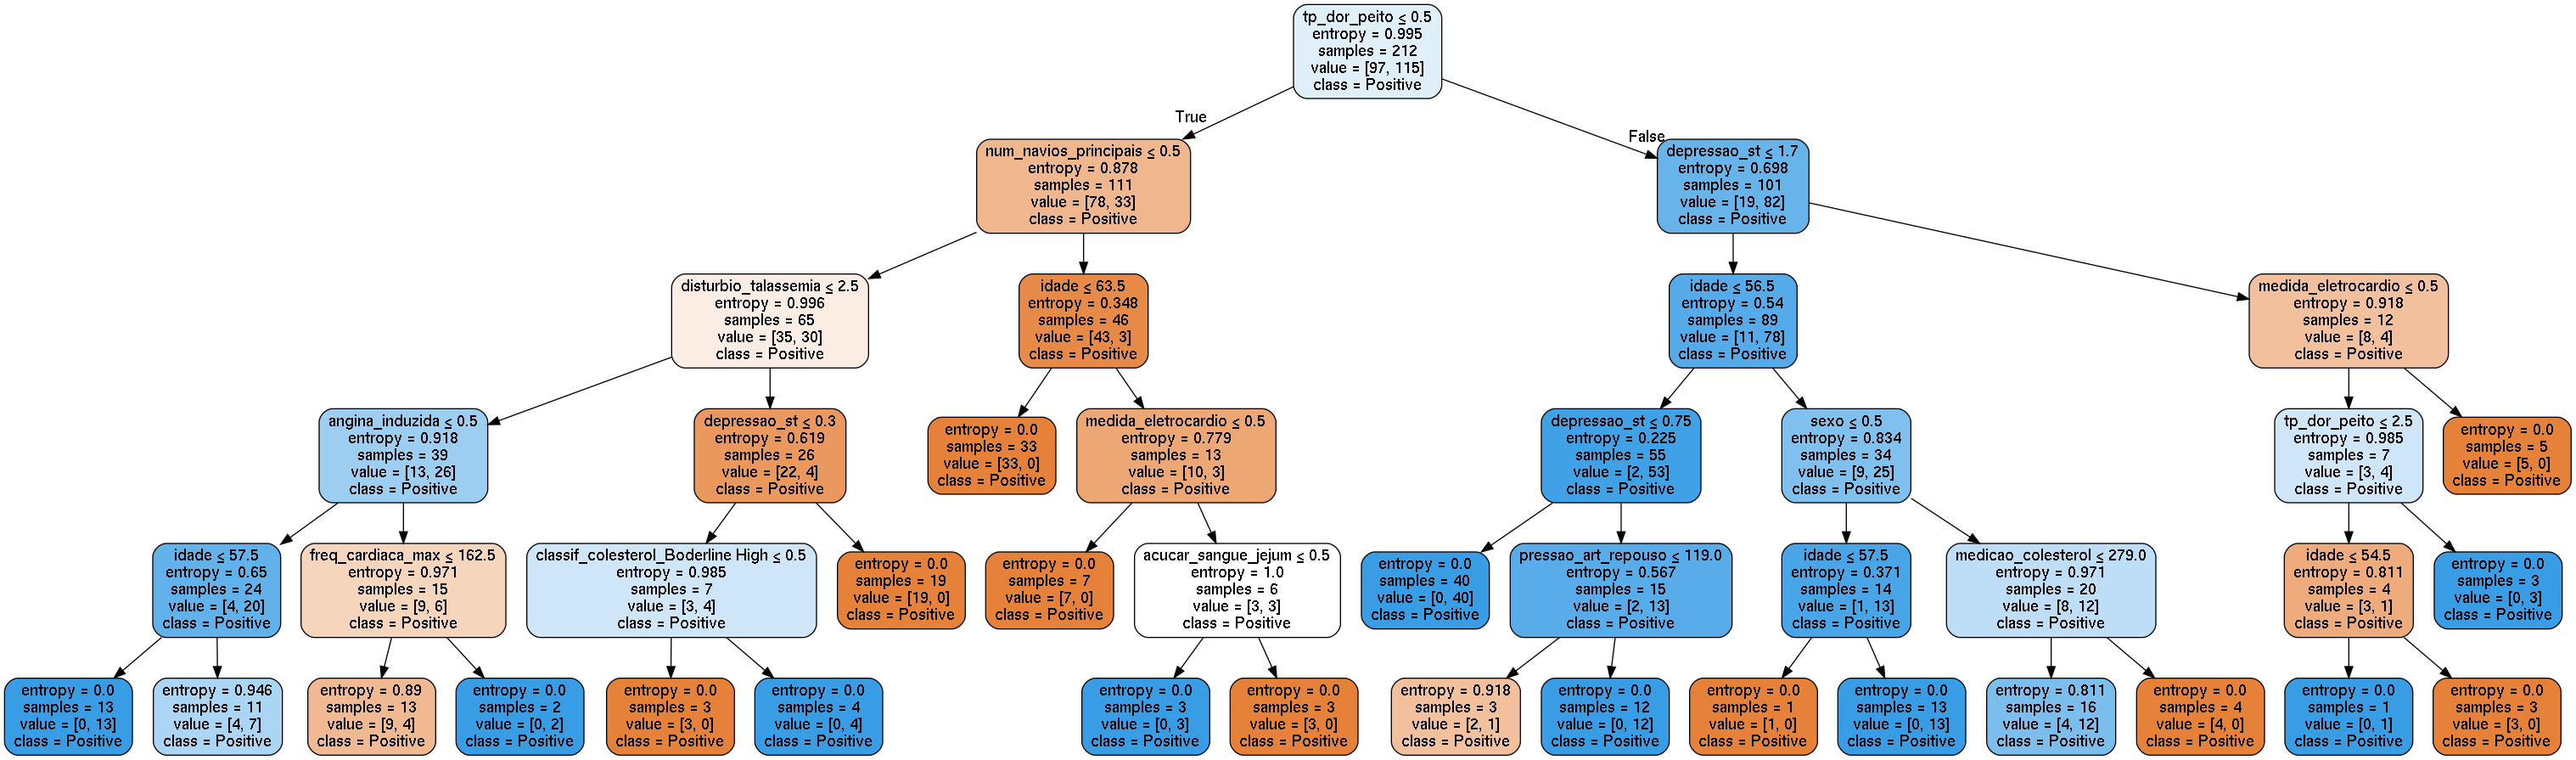

In [75]:
dot_data = StringIO()
export_graphviz(dectree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=expl.columns,
               class_names=tar)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<h4>Modelo <font color = 'red'>DGradient Boosting</font></h4>

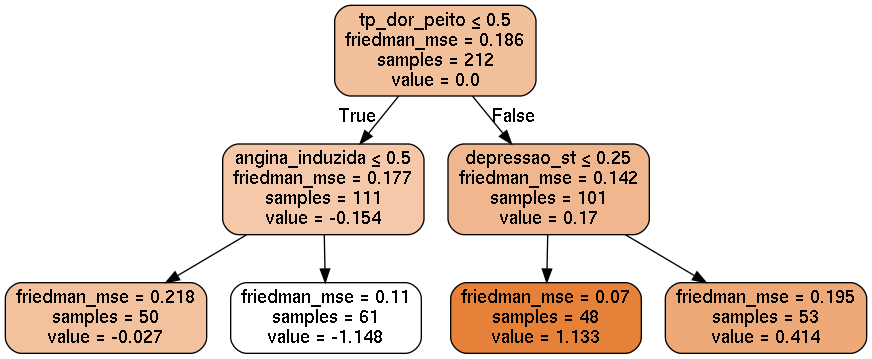

In [76]:
estimator = gbc.estimators_[5, 0]
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=expl.columns,
               class_names=tar)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

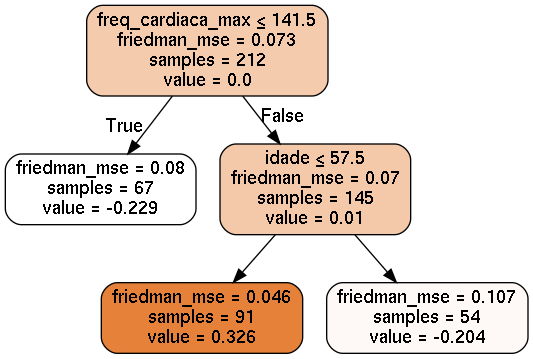

In [77]:
estimator = gbc.estimators_[99, 0]
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=expl.columns,
               class_names=tar)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<h3>Salvando o modelo</h3>

In [78]:
filename = 'Modelo_vencedor_doenca_cardiaca.pkl'
pickle.dump(gbc, open(filename, 'wb'))

In [79]:
modelo_salvo = pickle.load(open(filename, 'rb'))

In [80]:
modelo_salvo

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=48, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)